<a href="https://colab.research.google.com/github/Zora-33/Logistics/blob/master/Logistics_industry_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Delivery and user feedback data corresponding to the six types of products sold by the company**
# Problem:
# 1.To check if there are any problems with the delivery service
# 2.To check if there are sales areas that still have potential
# 3.To check whether the goods have quality problems

## **Data clean:** 
#####1.duplicate,missing value,format
#####2.Outliers

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv(r'/content/logistic/data_wuliu.csv',encoding='gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

####Conclusion: from info() we find we have 1161 data, but some of it is null and some of it is not in the format we want.
####1.The 0th, 4th, 8th features have null values, but the missing values are relatively low, so we can just delete 
####2.Data that is not relevant to the analysis can be deleted directly
####3.Modify format, data type

In [ ]:
#drop duplicates
data.drop_duplicates(keep='first',inplace=True) #keep the first data and drop the duplicates
print(data.info())
#drop missing value, the whole row
data.dropna(axis=0,how='any',inplace=True)  #0 is row, any means any missing value(0/1/...)
#don't forget the inplace
print(data.info())
#data=data.drop(columns=['订单行'])
data.drop(columns=['订单行'],inplace=True,axis=1)  #delete the column, so the axis=1
print(data.info())
########   Index must be updated!!!!!!
data.reset_index(drop=True,inplace=True)  #when it has inplace,we dont need th data=data.drop()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1150 non-null   object 
 1   订单行     1152 non-null   int64  
 2   销售时间    1152 non-null   object 
 3   交货时间    1152 non-null   object 
 4   货品交货状况  1150 non-null   object 
 5   货品      1152 non-null   object 
 6   货品用户反馈  1152 non-null   object 
 7   销售区域    1152 non-null   object 
 8   数量      1150 non-null   float64
 9   销售金额    1152 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 99.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   订单行     1146 non-null   int64  
 2   销售时间    1146 non-null   object 
 3   交货时间    1146 non-null   object 
 4   货品交货状况  1146 non-null   object 
 5   货品      11

In [ ]:
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,"32,39元"
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,"200,41元"
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,"79,44元"
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,"194,08元"
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,"32,18元"


In [ ]:
def data_deal(number):
  if number.find('万元') !=-1:   #-1 means find
    number_new=float(number[:number.find('万元')].replace(',',''))*10000
  else:
    number_new=float(number[:number.find('元')].replace(',',''))
  return number_new
data['销售金额']=data['销售金额'].map(data_deal)


In [ ]:
data.describe()
data= data[data['销售金额']!=0]
data.describe()
# from the describe we can see that the '销售金额' has left skewness, but from the Pareto principle(80/20 rule)
# 80% of consequences come from 20% of causes (the "vital few") 80/20 rule
# so we don't change the distribution 


,数量,销售金额
count,1145.000000,1.145000e+03
mean,76.134934,1.224557e+05
std,589.669861,1.115081e+06
min,1.000000,5.100000e+01
25%,1.000000,2.946000e+03
50%,1.000000,9.486000e+03
75%,4.000000,3.577300e+04
max,11500.000000,3.270000e+07


##   **Analyse to problem 1**
####to achieve the goal that we need to add a new column 'month', because we want to analyse the unit is month

In [ ]:
data['销售时间'] =pd.to_datetime(data['销售时间'])
data.info()
data['sale_month']= data['销售时间'].apply(lambda x:x.month)
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 0 to 1145
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单号     1145 non-null   object        
 1   销售时间    1145 non-null   datetime64[ns]
 2   交货时间    1145 non-null   object        
 3   货品交货状况  1145 non-null   object        
 4   货品      1145 non-null   object        
 5   货品用户反馈  1145 non-null   object        
 6   销售区域    1145 non-null   object        
 7   数量      1145 non-null   float64       
 8   销售金额    1145 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 89.5+ KB


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,sale_month
0,P096311,2016-07-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8
2,P097435,2016-07-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0,11


In [ ]:
data['货品交货状况']= data['货品交货状况'].str.strip()    #delete the space
data1 = data. groupby(['sale_month','货品交货状况']).size().unstack()
data1['On-time delivery rate']= data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1

货品交货状况,按时交货,晚交货,On-time delivery rate
sale_month,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


####Conclusion: On-time delivery rates are significantly lower from October to December than from July to August

In [ ]:

data1 = data. groupby(['销售区域','货品交货状况']).size().unstack()
data1['On-time delivery rate']= data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1.sort_values(by='On-time delivery rate',ascending=False)

货品交货状况,按时交货,晚交货,On-time delivery rate
销售区域,,,
泰国,183,4,0.978610
马来西亚,310,16,0.950920
华南,10,1,0.909091
华北,226,27,0.893281
华东,268,39,0.872964
西北,17,44,0.278689


####Conclusion: Very low on-time arrival of goods in the North West("西北")

In [ ]:

data1 = data. groupby(['货品','货品交货状况']).size().unstack()
data1['On-time delivery rate']= data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1.sort_values(by='On-time delivery rate',ascending=False)

货品交货状况,按时交货,晚交货,On-time delivery rate
货品,,,
货品5,183,4,0.978610
货品6,309,7,0.977848
货品1,27,2,0.931034
货品3,212,26,0.890756
货品2,269,48,0.848580
货品4,14,44,0.241379


####Conclusion: Goods 4 has very low on-time arrival 

##   **Analyse to problem 2**
####To check if there are sales areas that still have potential

In [ ]:
# according to month
data1 = data.groupby(['sale_month','货品'])['数量'].sum().unstack()
data1

货品,货品1,货品2,货品3,货品4,货品5,货品6
sale_month,,,,,,
7,283.0,491.0,2041.5,414.0,733.0,1649.0
8,1413.0,3143.0,1045.0,1188.0,2381.0,1181.0
9,1693.0,3020.0,2031.0,NaN,271.0,343.0
10,4.0,28420.0,1684.0,2542.0,1984.0,2358.0
11,20.0,2042.0,100.0,3.0,14.0,383.0
12,4.0,18205.0,2172.0,1082.0,350.0,2487.0


<Axes: xlabel='sale_month'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36135 (\N{CJK UNIFIED IDEOGRAPH-8D27}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36135 (\N{CJK UNIFIED IDEOGRAPH-8D27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


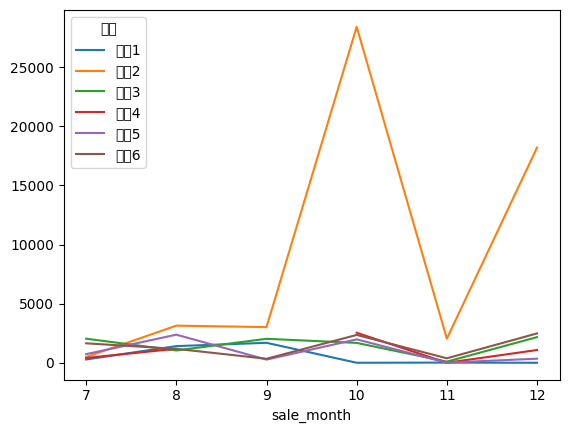

In [ ]:
data1.plot(kind='line')

#### Condlusion: Goods 2 sales jumped in October and December 

In [ ]:
data1 = data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data1

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


####Conclusion: Goods 1 has three sales areas, Goods 2 has two sales areas, the others goods only have one sales area.

In [ ]:
data1 = data.groupby(['sale_month','销售区域','货品'])['数量'].sum().unstack()
data1

货品                  货品1      货品2     货品3     货品4     货品5     货品6
sale_month 销售区域                                                 
7          华东       NaN    489.0     NaN     NaN     NaN     NaN
           华北       1.0      NaN  2041.5     NaN     NaN     NaN
           华南     282.0      NaN     NaN     NaN     NaN     NaN
           泰国       NaN      NaN     NaN     NaN   733.0     NaN
           西北       NaN      NaN     NaN   414.0     NaN     NaN
           马来西亚     NaN      2.0     NaN     NaN     NaN  1649.0
8          华东       NaN   1640.0     NaN     NaN     NaN     NaN
           华北    1410.0      NaN  1045.0     NaN     NaN     NaN
           华南       3.0      NaN     NaN     NaN     NaN     NaN
           泰国       NaN      NaN     NaN     NaN  2381.0     NaN
           西北       NaN      NaN     NaN  1188.0     NaN     NaN
           马来西亚     NaN   1503.0     NaN     NaN     NaN  1181.0
9          华东       NaN   3019.0     NaN     NaN     NaN     NaN
           华北    1409.0      NaN  2031.0     NaN     NaN     NaN
           华南     283.0      NaN     NaN     NaN     NaN     NaN
           泰国       NaN      NaN     NaN     NaN   271.0     NaN
           西北       1.0      NaN     NaN     NaN     NaN     NaN
           马来西亚     NaN      1.0     NaN     NaN     NaN   343.0
10         华东       NaN  28420.0     NaN     NaN     NaN     NaN
           华北       3.0      NaN  1684.0     NaN     NaN     NaN
           泰国       NaN      NaN     NaN     NaN  1984.0     NaN
           西北       1.0      NaN     NaN  2542.0     NaN     NaN
           马来西亚     NaN      NaN     NaN     NaN     NaN  2358.0
11         华东       NaN   2041.0     NaN     NaN     NaN     NaN
           华北       2.0      NaN   100.0     NaN     NaN     NaN
           华南       9.0      NaN     NaN     NaN     NaN     NaN
           泰国       NaN      NaN     NaN     NaN    14.0     NaN
           西北       9.0      NaN     NaN     3.0     NaN     NaN
           马来西亚     NaN      1.0     NaN     NaN     NaN   383.0
12         华东       NaN  18202.0     NaN     NaN     NaN     NaN
           华北       2.0      NaN  2172.0     NaN     NaN     NaN
           华南       2.0      NaN     NaN     NaN     NaN     NaN
           泰国       NaN      NaN     NaN     NaN   350.0     NaN
           西北       NaN      NaN     NaN  1082.0     NaN     NaN
           马来西亚     NaN      3.0     NaN     NaN     NaN  2487.0

In [ ]:
print(data1['货品1'])

sale_month  销售区域
7           华东         NaN
            华北         1.0
            华南       282.0
            泰国         NaN
            西北         NaN
            马来西亚       NaN
8           华东         NaN
            华北      1410.0
            华南         3.0
            泰国         NaN
            西北         NaN
            马来西亚       NaN
9           华东         NaN
            华北      1409.0
            华南       283.0
            泰国         NaN
            西北         1.0
            马来西亚       NaN
10          华东         NaN
            华北         3.0
            泰国         NaN
            西北         1.0
            马来西亚       NaN
11          华东         NaN
            华北         2.0
            华南         9.0
            泰国         NaN
            西北         9.0
            马来西亚       NaN
12          华东         NaN
            华北         2.0
            华南         2.0
            泰国         NaN
            西北         NaN
            马来西亚       NaN
Name: 货品1, dtype: float64


In [ ]:
print(data1['货品2'])

sale_month  销售区域
7           华东        489.0
            华北          NaN
            华南          NaN
            泰国          NaN
            西北          NaN
            马来西亚        2.0
8           华东       1640.0
            华北          NaN
            华南          NaN
            泰国          NaN
            西北          NaN
            马来西亚     1503.0
9           华东       3019.0
            华北          NaN
            华南          NaN
            泰国          NaN
            西北          NaN
            马来西亚        1.0
10          华东      28420.0
            华北          NaN
            泰国          NaN
            西北          NaN
            马来西亚        NaN
11          华东       2041.0
            华北          NaN
            华南          NaN
            泰国          NaN
            西北          NaN
            马来西亚        1.0
12          华东      18202.0
            华北          NaN
            华南          NaN
            泰国          NaN
            西北          NaN
            马来西亚        3.0
Nam

####Conclusion: Goods 2 sales jumped in October and December. Merchandise sales soar in Eastern China('华东'). Therefore, marketing efforts can be increased in July, August and September in Eastern China to boost sales.

##   **Analyse to problem 3**
####To check whether the goods have quality problems

In [ ]:
data['货品用户反馈'] =data['货品用户反馈'].str.strip()
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack()
data1

货品用户反馈      拒货   质量合格    返修
货品  销售区域                   
货品1 华北     NaN    3.0  12.0
    华南     5.0    4.0   2.0
    西北     NaN    1.0   2.0
货品2 华东    72.0  184.0  51.0
    马来西亚   6.0    1.0   3.0
货品3 华北    31.0  188.0  19.0
货品4 西北     NaN    9.0  49.0
货品5 泰国    14.0  144.0  29.0
货品6 马来西亚  56.0  246.0  14.0

In [ ]:
print(data1.sum(axis=1))  #Sum by row
data1['Rejection rate'] = data1['拒货']/data1.sum(axis=1)
data1['Return rate'] = data1['返修']/data1.sum(axis=1)
data1['Passing rate'] = data1['质量合格']/data1.sum(axis=1)
print(data1)

货品   销售区域
货品1  华北       15.000000
     华南       12.295442
     西北        3.000000
货品2  华东      307.702868
     马来西亚     11.674428
货品3  华北      238.390472
货品4  西北       58.000000
货品5  泰国      187.224479
货品6  马来西亚    316.531249
dtype: float64
货品用户反馈      拒货   质量合格    返修  Rejection rate  Return rate  Passing rate
货品  销售区域                                                              
货品1 华北     NaN    3.0  12.0             NaN     0.800000      0.189873
    华南     5.0    4.0   2.0        0.406655     0.163067      0.333589
    西北     NaN    1.0   2.0             NaN     0.666667      0.272727
货品2 华东    72.0  184.0  51.0        0.233992     0.165745      0.598114
    马来西亚   6.0    1.0   3.0        0.513944     0.258164      0.088410
货品3 华北    31.0  188.0  19.0        0.130039     0.079701      0.788790
货品4 西北     NaN    9.0  49.0             NaN     0.844828      0.152945
货品5 泰国    14.0  144.0  29.0        0.074777     0.154894      0.768802
货品6 马来西亚  56.0  246.0  14.0        0.176918     0

####Conclusion: Goods 3, 5 and 6 have a relatively high pass rate and has relatively low return rate. This means that the goods are of good quality. The low pass rate and high return rate of goods 1, 2 and 4 indicate that the quality of the goods has some problems and needs to be improved. The goods 2 has the highst rejection rate in Malaysia.The above analysis also shows that the on-time delivery rate of goods 2 in Malaysia is also very low.So it may not be about the quality of the product, but about whether the goods are delivered on time.